## Descriptive Statistics

Descriptive Statistics, provides a summary of your dataset giving a measure of the centre, dispersion and shape of your data. Here the data is described as a sample of the whole population, and there are no inferences made from the sample to the whole population, unlike Inferential Statistics, in which we model the data on the basis of probability theory.

## Key Elements of Descriptive Statistics

### Measures Of Central Tendency

* Mean
* Median
* Mode

### Measures Of Spread

* Range
* Outliers
* Interquantile Range
* Variance

### Dependence

* Correlation v/s Causation
* Covariance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

In [3]:
# house price prediction
data = pd.read_csv('./dataset/train.csv')

In [4]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
data.shape

(1460, 81)

In [7]:
# pd.set_option('max_columns', 81)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
@interact
def check(column = list(data.select_dtypes('number').columns),
          column2 = list(data.select_dtypes('number').columns)[1:]):
    print("Correlation : ",data[column].corr(data[column2]))

interactive(children=(Dropdown(description='column', options=('Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'O…

In [9]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

@interact_manual
def check(column1 = list(data.select_dtypes('object').columns),
          column2 = list(data.select_dtypes('number').columns)):
    sns.boxplot(data[column1], data[column2])
    plt.show()

interactive(children=(Dropdown(description='column1', options=('MSZoning', 'Street', 'Alley', 'LotShape', 'Lan…

In [10]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

@interact_manual
def check(column1 = list(data.select_dtypes('number').columns)[1:],
          column2 = list(data.select_dtypes('number').columns)[2:]):
    sns.scatterplot(data[column1], data[column2])
    plt.show()

interactive(children=(Dropdown(description='column1', options=('MSSubClass', 'LotFrontage', 'LotArea', 'Overal…

In [11]:
# lets check the shape of the data
data.shape

(1460, 81)

In [4]:
# lets check the column names
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [15]:
# head of the dataset
# pd.set_option('max_columns', 81)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [12]:
# stats at a glance
@interact
def check(column = list(data.select_dtypes('object').columns)):
    return data[[column,'SalePrice']].groupby(column).agg(['max','min','mean','median','std','sum','count'])

interactive(children=(Dropdown(description='column', options=('MSZoning', 'Street', 'Alley', 'LotShape', 'Land…

In [13]:
# lets check the Target Column of the Data
data['SalePrice'].head(20)

0     208500
1     181500
2     223500
3     140000
4     250000
5     143000
6     307000
7     200000
8     129900
9     118000
10    129500
11    345000
12    144000
13    279500
14    157000
15    132000
16    149000
17     90000
18    159000
19    139000
Name: SalePrice, dtype: int64

### Mean SalePrice

In [14]:
# checking the average price of houses
mean = np.mean(data['SalePrice'])
print(mean)

180921.19589041095


### Disadvantage of Mean

* Finding mean is not a good approach as the 'Mean is often affected by Outliers' or in simple words if there are some observations larger or smaller than majority of the other observations then the mean tends to deviate towards these values.

* To generalize it if the distribution of datasets is skewed(troubled by outliers), we do not choose mean. Here we will have to go for Median.

## Median of SalePrice

In [15]:
# checking the average price of houses
median = np.median(data['SalePrice'])
print(median)

163000.0


* We can see there is a Huge difference in the Mean and Median Values, which tells us that there are Outliers in this column

## Median and Inter Quantile Range

* Taking the concept of median a step further, we can define the Inter - Quartile Range.
* IQR is a measure of variability and is based on dividing a data set into quartiles.
* Quartile is the division of a set of observations into four intervals based on the values of the data.

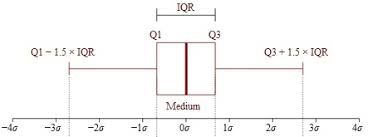

**The interquartile range is equal to Q3 minus Q1.**

**For example,** 
* consider the following numbers: 1, 3, 4, 5, 5, 6, 7, 11.

    * Q1 is the middle value in the first half of the data set.
    * Since there are an even number of data points in the first half of the data set, the middle value is the average of the two middle values; that is, Q1 = (3 + 4)/2 or Q1 = 3.5. Q3 is the middle value in the second half of the data set. 
    * Again, since the second half of the data set has an even number of observations, the middle value is the average of the two middle values; that is, Q3 = (6 + 7)/2 or Q3 = 6.5.
    * The interquartile range is Q3 minus Q1, so IQR = 6.5 - 3.5 = 3.
    
    
### Box Plot View for IQR

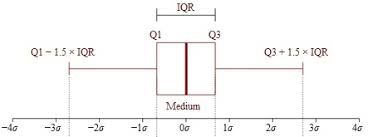


### Outliers with Box Plot

* The Boxplot above shows some additional observations below MINIMUM and above MAXIMUM. These are Outliers.
* There are many ways to mathematically represent or define outliers. One such method is using IQR.

In [16]:
x= data['SalePrice'].quantile(0.95)
x

326099.9999999999

In [17]:
### IQR 

# Median
median = np.median(data['SalePrice'])
print("Median :",median)

# lower quartile  
q1 = data['SalePrice'].quantile(0.25)

# upper quartile
q3 = data['SalePrice'].quantile(0.75)

# printing Results
print("Q1:", q1)
print("Q3:", q3)
print("IQR:", q3 - q1)

Median : 163000.0
Q1: 129975.0
Q3: 214000.0
IQR: 84025.0


* Here, IQR is Representing the Middle 50% of the values in the sales price column, Whereas the Mean and Median Values are having a hug gap in their values that means there are so many outliers in the data, let's try checking these outliers using a box plot

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


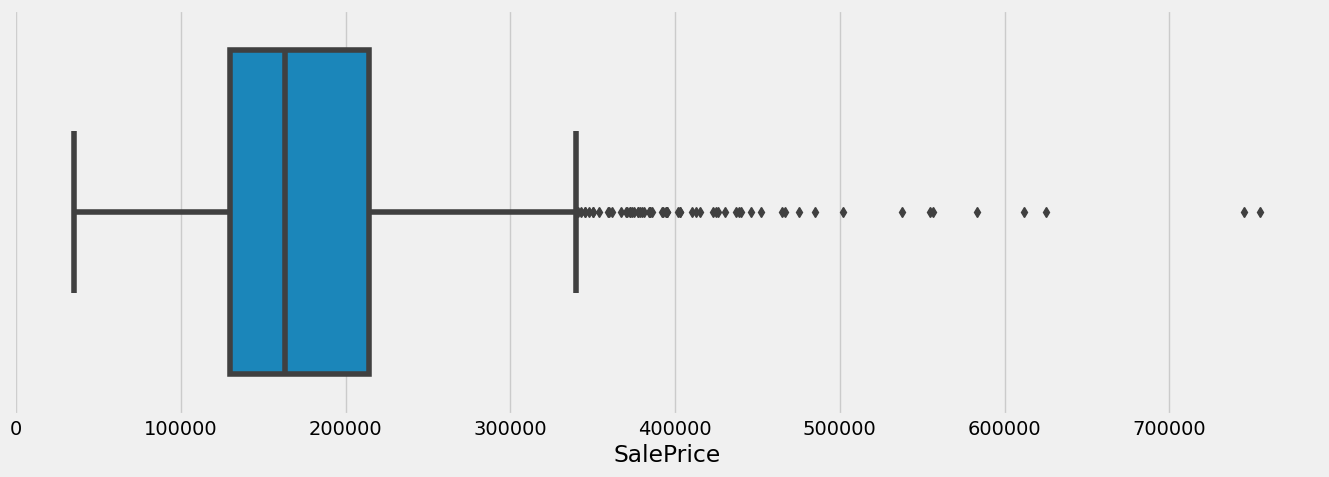

In [18]:
sns.boxplot(data['SalePrice'])
plt.show()

In [19]:
## lets find no. of outliers

# for that we have to find the upper and ower outlier limit
outlier_lower_limit = q1 - 1.5*(q3 - q1)
outlier_upper_limit = q3 + 1.5*(q3 - q1)
print("Outlier Upper Limit :", outlier_lower_limit)
print("Outlier Lower Limit :", outlier_upper_limit)

Outlier Upper Limit : 3937.5
Outlier Lower Limit : 340037.5


In [20]:
Sales_price = data['SalePrice']

lower_limit_outliers = Sales_price[Sales_price < outlier_lower_limit].count()

upper_limit_outliers = Sales_price[Sales_price > outlier_upper_limit].count()

print("lower_limit_outliers:", lower_limit_outliers)
print("upper_limit_outliers:", upper_limit_outliers)
print("total outliers:", upper_limit_outliers + lower_limit_outliers)

lower_limit_outliers: 0
upper_limit_outliers: 61
total outliers: 61


## Skewness

In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive or negative, or undefined

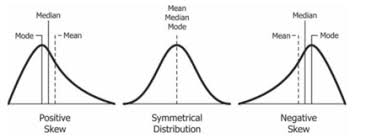

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


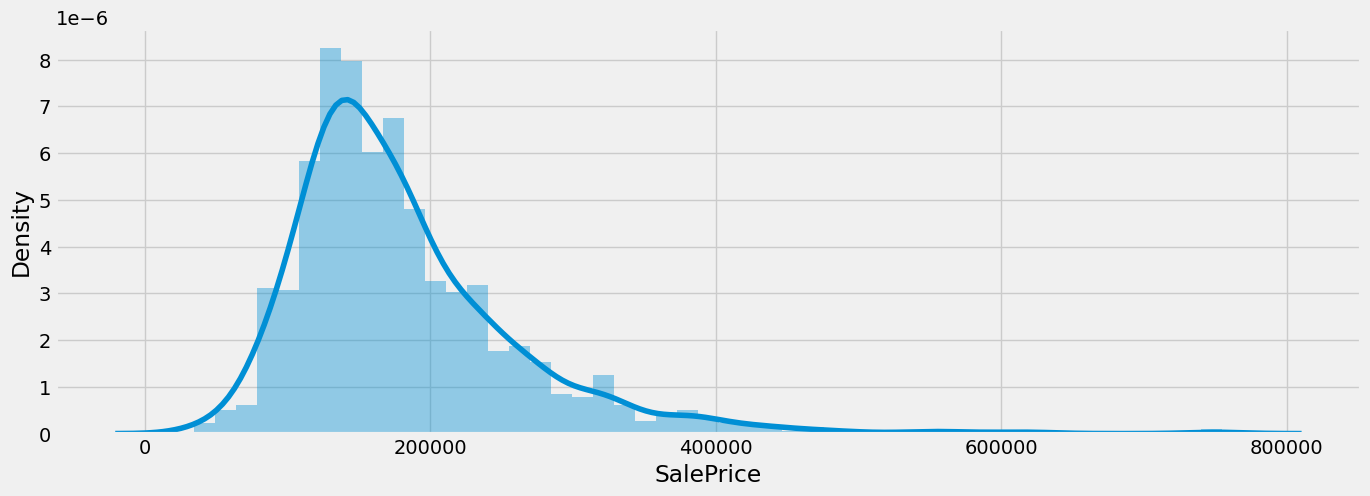

In [21]:
# lets check the skewness of the data
sns.distplot(data['SalePrice'])
plt.show()

Thus, we see that our Histogram is "Positively Skewed"

We can see different examples of Skewness from the image on the previous slide and see how Mean, and the Median are affected in each distribution

## Mode

In [22]:
mode = Sales_price.mode()
print(mode)

0    140000
Name: SalePrice, dtype: int64


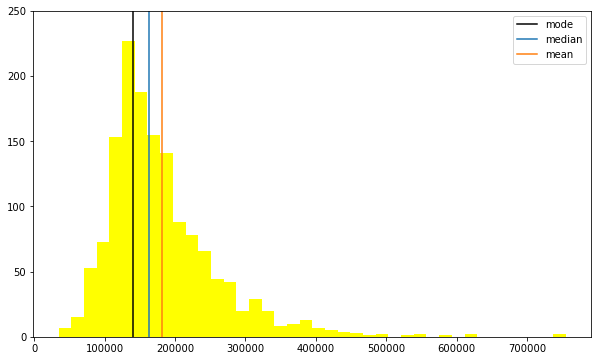

In [30]:
## plot the hist with mean median and mode - This needs to be checked! 

plt.figure(figsize=(10, 6)) 
plt.hist(Sales_price, bins=40, color = 'yellow')
plt.plot([mode]*300, range(300), color = 'black', label='mode') 
plt.plot([median]*300, range(300), label='median')
plt.plot([mean]*300, range(300), label='mean')
plt.ylim(0, 250)
plt.legend()
plt.show()


## Spread of the Data

* Let's choose the value 250,000 from the SalePrice column and check how far this value is from the mean when compared to other points in the data set
* We measure this as follows:
      (250,000 - mean)/Random Variation
* We know the mean, we found that before

* What is Random Variation?
    * It's nothing but the Average variation of the data from the mean


### Range of the Data

* Range of data is simply:
    * Max Value of Data - Min Value of data


In [23]:
Range = np.max(Sales_price)-np.min(Sales_price)
Range


720100

## Variance of the Data

In [24]:

variance = Sales_price.var()
print(variance)

6311111264.297448


### Standard Deviation

In [25]:
from math import sqrt

std = sqrt(variance)
print(std)

79442.50288288662


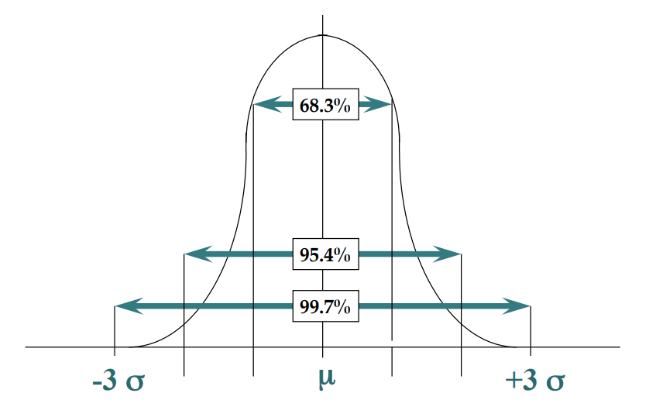

### Correlation

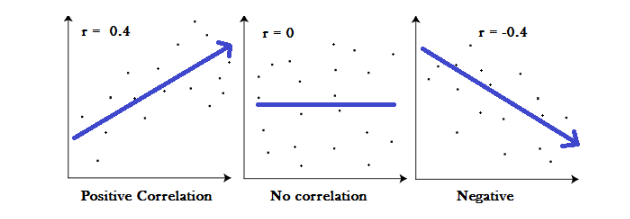

* A correlation coefficient of 1 means that for every positive increase of 1 in one variable, there is a positive increase of 1 in the other.
* A correlation coefficient of -1 means that for every positive increase of 1 in one variable, there is a negative decrease of 1 in the other.
* Zero means that for every increase, there isn’t a positive or negative increase. The two just aren’t related.

### What is the Correlation between the Sales price and the Living Room Area?



In [26]:
data['GrLivArea'].value_counts()

864     22
1040    14
894     11
1456    10
848     10
        ..
2296     1
1123     1
1199     1
1473     1
1256     1
Name: GrLivArea, Length: 861, dtype: int64

In [27]:
# lets find out the correlation

living_room_area = data.GrLivArea

# Returns Pearson product-moment correlation coefficients.
corr = np.corrcoef(Sales_price, living_room_area)[0,1] 
print("Correlation Between Sales Price and the Living Room Area is {0:.2f}".format(corr*100))

Correlation Between Sales Price and the Living Room Area is 70.86


In [28]:
#considering 4 continous variable and finding the correlation

x = data[['LotArea','GrLivArea','GarageArea','SalePrice']]
corr = x.corr()     
print(corr)

             LotArea  GrLivArea  GarageArea  SalePrice
LotArea     1.000000   0.263116    0.180403   0.263843
GrLivArea   0.263116   1.000000    0.468997   0.708624
GarageArea  0.180403   0.468997    1.000000   0.623431
SalePrice   0.263843   0.708624    0.623431   1.000000


### Correlation doesn't imply Causation

* However, correlation does not imply causation. There may be, for example, an unknown factor that influences both variables similarly.

* Causation indicates that one event is the result of the occurrence of the other event; i.e. there is a causal relationship between the two events. This is also referred to as cause and effect.

* A statistically significant correlation has been reported, for example, between yellow cars and a lower incidence of accidents. That does not indicate that yellow cars are safer, but just that fewer yellow cars are involved in accidents. A third factor, such as the personality type of the purchaser of yellow cars, is more likely to be responsible than the color of the paint itself.

In [29]:
## Covariance

data[['LotArea','GrLivArea','GarageArea','SalePrice']].cov()

,LotArea,GrLivArea,GarageArea,SalePrice
LotArea,9.962565e+07,1.380033e+06,3.849872e+05,2.092111e+08
GrLivArea,1.380033e+06,2.761296e+05,5.269198e+04,2.958187e+07
GarageArea,3.849872e+05,5.269198e+04,4.571251e+04,1.058910e+07
SalePrice,2.092111e+08,2.958187e+07,1.058910e+07,6.311111e+09
